In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Load dataset
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()

print(df.info())
print("\nJumlah nilai kosong per kolom:")
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Jumlah nilai kosong per kolom:
age               0
workclass         0
fnlwgt          

In [ ]:
#Bersihkan kolom yang tidak perlu
df = df.drop(columns=["education"])

In [ ]:
#Siapkan fitur dan target
X = df.drop("income", axis=1)
y = df["income"]

In [ ]:
#Identifikasi Kolom Numerik vs Kategorika
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

print("Numerical cols:\n", num_cols)
print("\nCategorical cols:\n", cat_cols)

Numerical cols:
 Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

Categorical cols:
 Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country'],
      dtype='object')


In [ ]:
#Bangun Pipeline Preprocessing
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)



In [ ]:
#Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nJumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])
print("Model trained!")


Jumlah data training: 26048
Jumlah data testing: 6513
Model trained!


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)

rf_clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", rf_model)
])

rf_clf.fit(X_train, y_train)
print("\nRandom Forest trained!")


Random Forest trained!


In [ ]:
y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

print("\n=== RANDOM FOREST ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score((y_test == ">50K").astype(int), y_proba_rf))


=== RANDOM FOREST ===
Confusion Matrix:
[[4603  342]
 [ 600  968]]

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      4945
        >50K       0.74      0.62      0.67      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513

Accuracy: 0.855366190695532
ROC AUC: 0.903192644600813


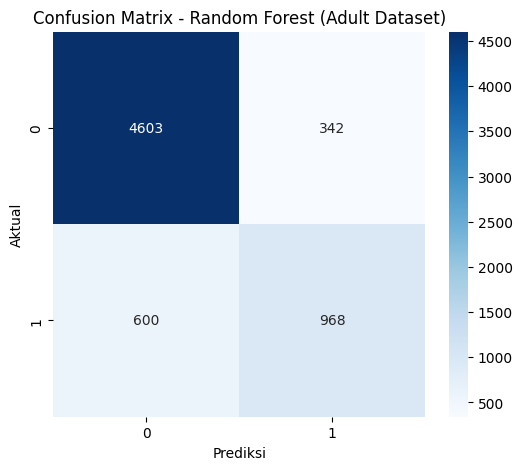

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.title("Confusion Matrix - Random Forest (Adult Dataset)")
plt.ylabel("Aktual")
plt.xlabel("Prediksi")
plt.show()

In [ ]:
# MODEL 2: DECISION TREE
dt_model = DecisionTreeClassifier(
    class_weight="balanced",
    random_state=42
)

dt_clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", dt_model)
])

dt_clf.fit(X_train, y_train)
print("\nDecision Tree trained!")



Decision Tree trained!


In [ ]:
# Prediksi Decision Tree
y_pred_dt = dt_clf.predict(X_test)
y_proba_dt = dt_clf.predict_proba(X_test)[:, 1]

print("\n=== DECISION TREE ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score((y_test == ">50K").astype(int), y_proba_dt))


=== DECISION TREE ===
Confusion Matrix:
[[4366  579]
 [ 599  969]]

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      4945
        >50K       0.63      0.62      0.62      1568

    accuracy                           0.82      6513
   macro avg       0.75      0.75      0.75      6513
weighted avg       0.82      0.82      0.82      6513

Accuracy: 0.8191309688315677
ROC AUC: 0.7504483631167331


In [ ]:
import joblib

joblib.dump(rf_clf, "model_rf_adult_income.pkl")
joblib.dump(dt_clf, "model_dt_adult_income.pkl")

print("\nModel berhasil disimpan!")


Model berhasil disimpan!
